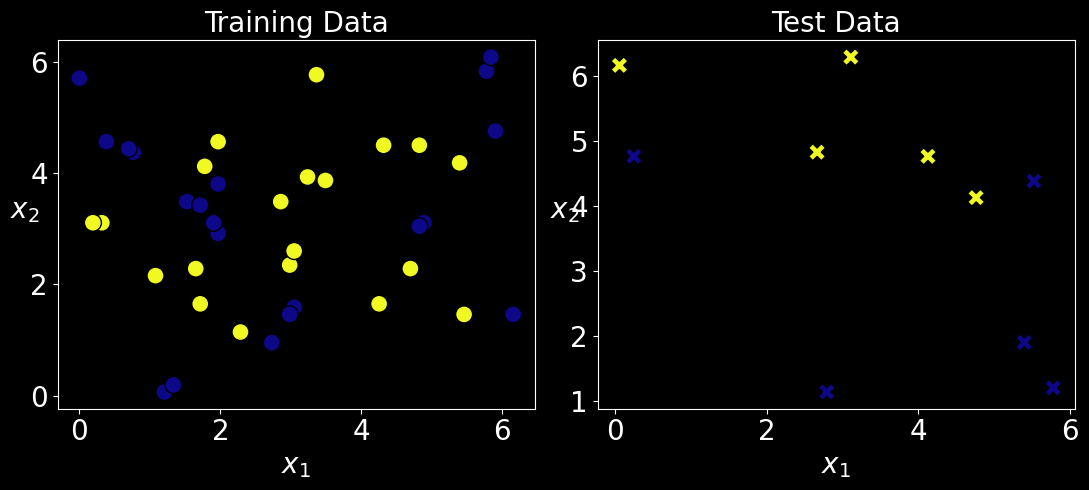

In [1]:
from qmlab.data_generation import generate_random_data
from qmlab.plotting import plot_2d_data_with_train_test_split, plot_decision_boundaries

random_state = 12345

X_train, y_train, X_test, y_test = generate_random_data(
    feature_dimension=2,
    training_examples_per_class=20,
    test_examples_per_class=5,
    delta=0.3,
    random_state=random_state,
    device="cpu",
)

plot_2d_data_with_train_test_split(X_train, y_train, X_test, y_test, separate_plots=True)

$$ \tt{accuracy}(\mathcal{\hat{Y}}, \mathcal{Y}) = \frac{1}{m} \sum_{i=1}^m \delta_{\hat{y}_i\,y_i} \qquad 
\mathcal{\hat{Y}}, \mathcal{Y} \in \mathbb{R}^d$$ 

In [2]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", random_state=random_state)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.6

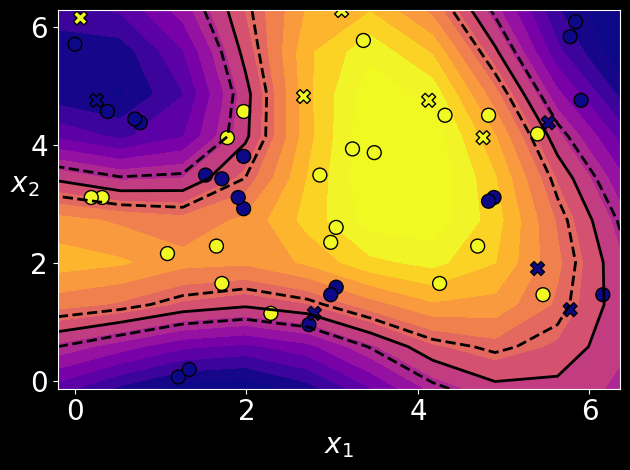

In [3]:
plot_decision_boundaries(svm, X_train, y_train, X_test, y_test)

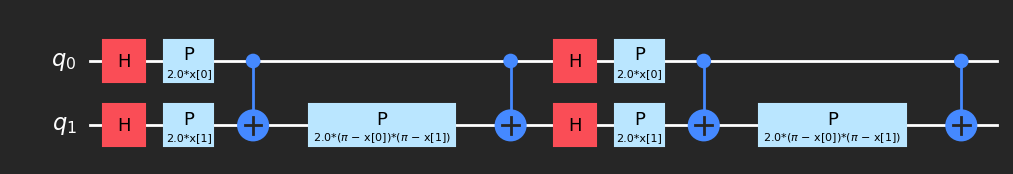

In [4]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qmlab.kernel import FidelityQuantumKernel
from qiskit.primitives import Sampler

qfm = ZZFeatureMap(feature_dimension=X_train.shape[1])
fidelity = ComputeUncompute(sampler=Sampler())

qfm.decompose().draw(output="mpl", style="iqp-dark")

In [5]:
fidelity = ComputeUncompute(sampler=Sampler())

qfm = ZZFeatureMap(feature_dimension=X_train.shape[1])

quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=qfm)

qsvc = SVC(
    kernel=quantum_kernel.evaluate_kernel, random_state=random_state
)
qsvc.fit(X_train, y_train)
qsvc.score(X_test, y_test)

1.0

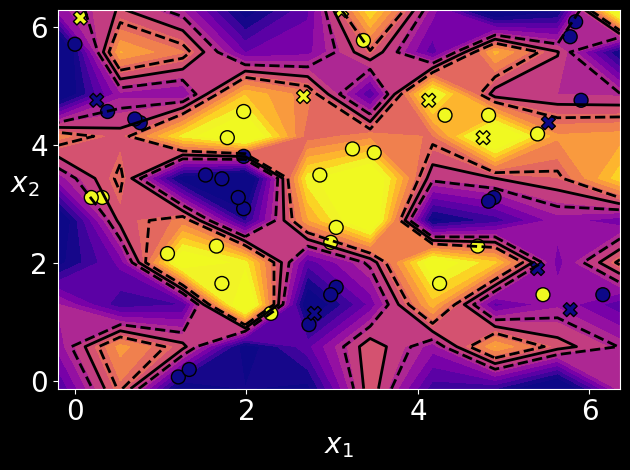

In [6]:
plot_decision_boundaries(qsvc, X_train, y_train, X_test, y_test)

In [7]:
X_train, y_train, X_test, y_test = generate_random_data(
    feature_dimension=4,
    training_examples_per_class=20,
    test_examples_per_class=5,
    delta=0.3,
    random_state=random_state,
)
X_train.shape

(40, 4)

In [8]:
svm = SVC(kernel="rbf", random_state=random_state)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5

In [9]:
qfm = ZZFeatureMap(feature_dimension=X_train.shape[1])
q_kernel = FidelityQuantumKernel(feature_map=qfm)

qsvm = SVC(kernel=q_kernel.evaluate_kernel, random_state=random_state)
qsvm.fit(X_train, y_train)
qsvm.score(X_test, y_test)

0.9